# Введение

✍ Добро пожаловать в новый модуль, посвящённый машинному обучению.

В этом модуле мы продолжаем знакомиться с принципами построения моделей на базовом уровне. На этот раз мы поговорим о параметрах модели, а точнее о гиперпараметрах. Но для начала давайте выполним небольшой тест ↓

### Задание 1.1

Какой параметр в модели Decision Tree библиотеки sklearn отвечает за максимальную глубину дерева?

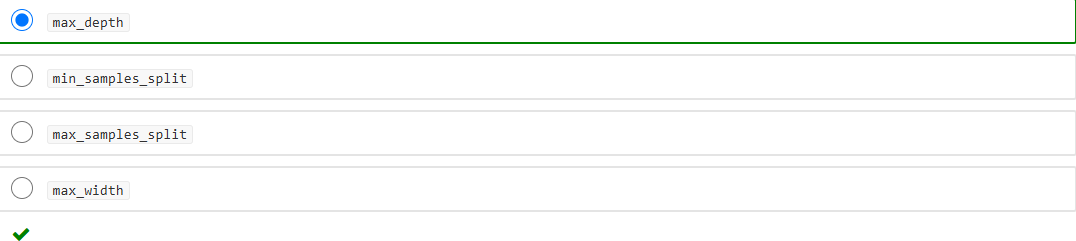

### Задание 1.2

Какой параметр в моделях Lasso и Ridge библиотеки sklearn обозначает коэффициент регуляризации?

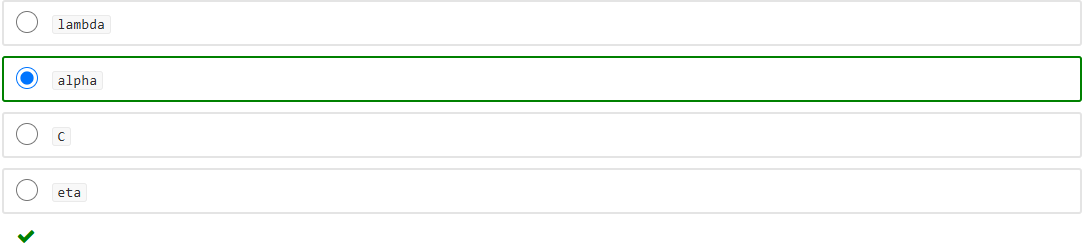

### Задание 1.3

Какой параметр в модели Random Forest библиотеки sklearn отвечает за количество деревьев в лесу?

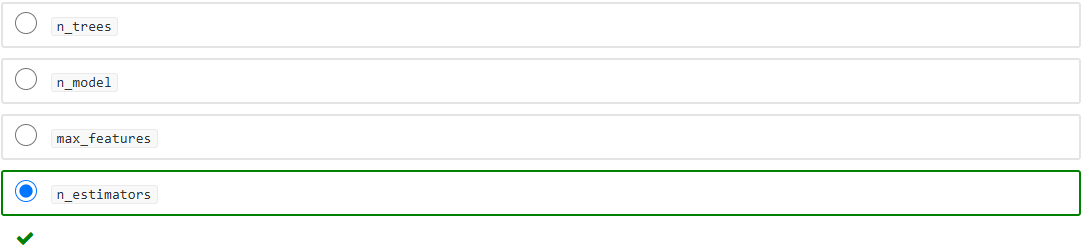

### Задание 1.4

Что такое утечка данных в машинном обучении?

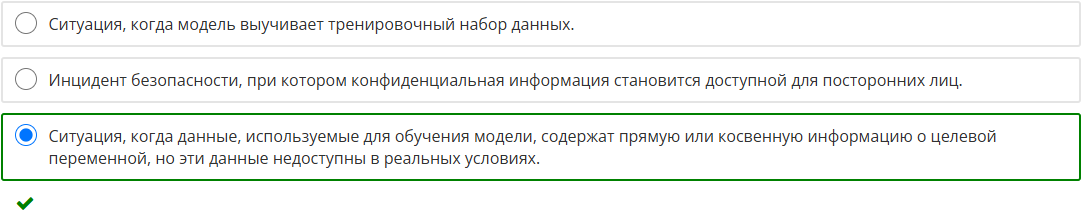

### Задание 1.5

Производится кросс-валидация на 15 фолдах. Размер выборки, поданной на кросс-валидацию, — (1500, 18). Сколько раз будет обучаться модель?

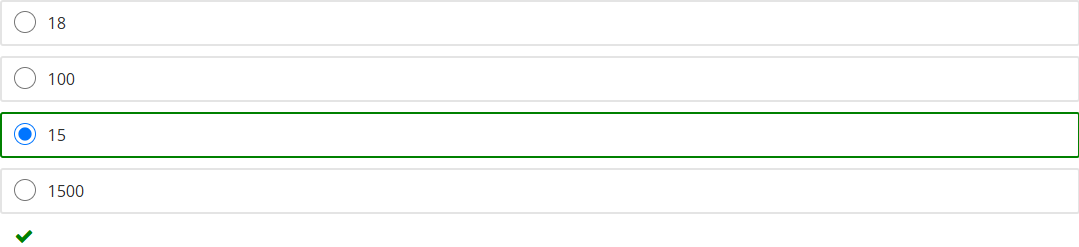

Итак, как мы уже неоднократно упоминали ранее, в машинном обучении есть два типа параметров.

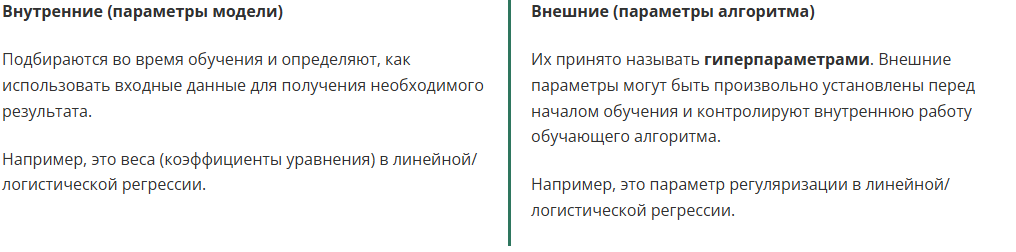

**Гиперпараметры** отвечают за сложность взаимосвязи между входными признаками и целевой переменной, поэтому сильно влияют на модель и качество прогнозирования.

Продемонстрируем это на примере задачи **регрессии** с помощью двух графиков работы алгоритма случайного леса, построенного на основе 5, 100 деревьев (n_estimators = [5, 100]):

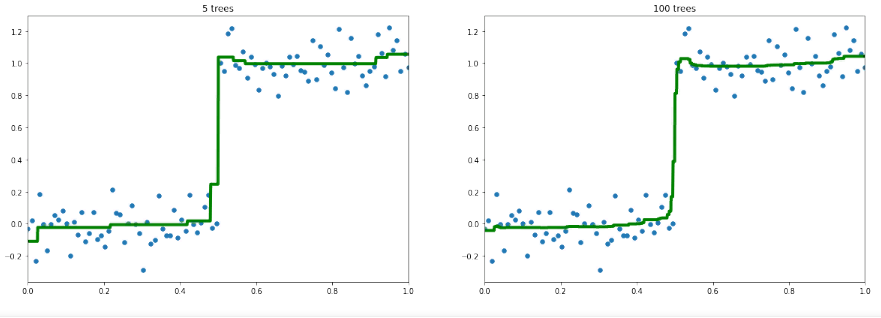

Видим, что при 100 деревьях модель находит более сложную закономерность в данных и точность соответственно будет выше, чем при 5.

Каждый алгоритм МО имеет набор гиперпараметров, которые определяют, как именно он строит модель на обучающей выборке. Например, в модуле ML-2 для повышения эффективности модели мы уже рассматривали подбор параметра регуляризации  для алгоритма линейной регрессии Ridge.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_excel('data/data_ford_price.xlsx')

data

data = data[['price','year', 'cylinders', 'odometer', 'lat', 'long', 'weather']]
data.dropna(inplace = True)

y = data['price']
x = data.drop(columns='price')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [6]:
#Создаем список из 20 возможных значений от 0.001 до 10
alpha_list = np.linspace(0.01, 10, 20)
#Создаем пустые списки, в которые будем добавлять результаты 
train_scores = []
test_scores = []
for alpha in alpha_list:
    #Создаем объект класса линейная регрессия с L2-регуляризацией
    ridge_lr_poly = linear_model.Ridge(alpha=alpha, max_iter=10000)
    #Обучаем модель предсказывать логарифм целевого признака
    ridge_lr_poly.fit(X_train_scaled_poly, y_train_log)
    #Делаем предсказание для каждой из выборок
    #Если обучили на логарифме, то от результата необходимо взять обратную функцию - экспоненту
    y_train_predict_poly = np.exp(ridge_lr_poly.predict(X_train_scaled_poly))
    y_test_predict_poly = np.exp(ridge_lr_poly.predict(X_test_scaled_poly))
    #Рассчитываем метрику для двух выборок и добавляем их в списки
    train_scores.append(metrics.mean_absolute_error(y_train, y_train_predict_poly))
    test_scores.append(metrics.mean_absolute_error(y_test, y_test_predict_poly))
 
#Визуализируем изменение R^2 в зависимости от alpha
fig, ax = plt.subplots(figsize=(12, 4)) #фигура + координатная плоскость
ax.plot(alpha_list, train_scores, label='Train') #линейный график для тренировочной выборки
ax.plot(alpha_list, test_scores, label='Test') #линейный график для тестовой выборки
ax.set_xlabel('Alpha') #название оси абсцисс
ax.set_ylabel('MAE') #название оси ординат
ax.set_xticks(alpha_list) #метки по оси абцисс
ax.xaxis.set_tick_params(rotation=45) #поворот меток на оси абсцисс
ax.legend(); #отображение легенды

NameError: name 'X_train_scaled_poly' is not defined

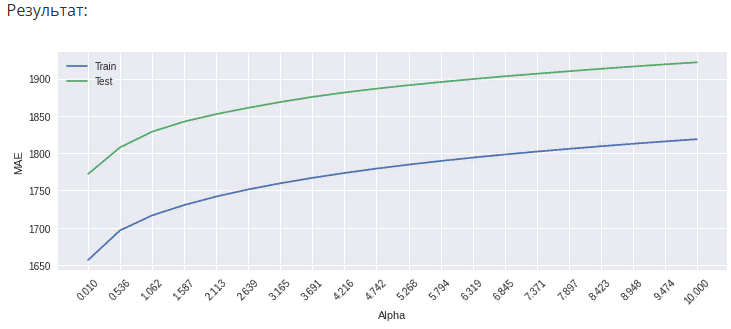

Наилучшее значение метрики соответствует  (кстати, можно попробовать перебрать значения ).

В данном случае мы просто воспользовались циклом for и перебрали некоторые заданные значения alpha, хотя, по всей видимости, не самые оптимальные. Поэтому подобранные эмпирическим путём значения гиперпараметров с большей вероятностью дадут низкую прогностическую эффективность.

Также рассмотренный метод визуализации зависимости метрики от гиперпараметра позволяет выбрать только один внешний параметр, в данном случае — alpha. А что делать, если у нас не один, а несколько? 

Например, вспомним основные внешние параметры DecisionTreeClassifier:

- **criterion** — критерий информативности. Может быть равен **'gini'** — критерий Джини — и **'entropy'** — энтропия Шеннона.
- **max_depth** — максимальная глубина дерева. По умолчанию **None**, глубина дерева не ограничена.
- **max_features** — максимальное число признаков, по которым ищется лучшее разбиение в дереве. По умолчанию **None**, то есть обучение производится на всех признаках.
- **min_samples_leaf** — минимальное число объектов в листе. По умолчанию — 1.

Мы, конечно, можем сделать кучу вложенных циклов. Однако, поскольку поиск оптимальных значений гиперпараметров является общераспространенной задачей МО, библиотека scikit-learn и другие предлагают методы, позволяющие её решить.

Тщательный подбор гиперпараметров гарантирует, что модель покажет максимально возможную точность на обучающих данных, но **это совершенно не означает хороший результат на тестовых или новых данных**.

Поиск оптимальных значений гиперпараметров модели является сложной задачей, обязательной почти для всех моделей и наборов данных. Однако важно понимать смысл гиперпараметров перед их подбором.

## Цели модуля

- Узнать, какие есть базовые способы оптимизации гиперпараметров (GridSearchCV, RandomSearchCV).
- Узнать, какие есть продвинутые способами оптимизации (Hyperopt, Optuna).
- Научиться их настраивать и обучать модели с их использованием — так, чтобы улучшать итоговую метрику.  
- Провести сравнение и понять преимущества и недостатки каждого из методов.